In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Import Dataset

In [2]:
df = pd.read_csv("Manhattan12.csv", skiprows = 4)

# Data Cleaning

In [3]:
categorical_list = df.select_dtypes(include=['object'])
categorical_list.head(5)

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,RESIDENTIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
0,,13 CONDOS - ELEVATOR APARTMENTS,,,,345 WEST 14TH STREET,,0,0,0,0,R4,"$2,214,693",20/05/2013
1,,13 CONDOS - ELEVATOR APARTMENTS,,,,345 WEST 14TH STREET,,0,0,0,0,R4,"$1,654,656",16/05/2013
2,,13 CONDOS - ELEVATOR APARTMENTS,,,,345 WEST 14TH STREET,,0,0,0,0,R4,"$1,069,162",23/05/2013
3,,13 CONDOS - ELEVATOR APARTMENTS,,,,345 WEST 14TH STREET,,0,0,0,0,R4,"$1,374,637",15/05/2013
4,,13 CONDOS - ELEVATOR APARTMENTS,,,,345 WEST 14TH STREET,,0,0,0,0,R4,"$1,649,565",13/05/2013


In [4]:
df.rename({'SALE\nPRICE': 'SALE PRICE'}, axis=1, inplace=True)

In [5]:
df = df.replace('[$]','', regex=True)
df = df.replace(',','', regex=True)

In [6]:
for col in ['RESIDENTIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']: 
    df[col] = df[col].astype('int')

In [7]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

C:\Users\Aishwarya\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '20/05/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Aishwarya\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/05/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Aishwarya\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23/05/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Aishwarya\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/05/2013' in DD/MM/YYYY format. Provide 

In [8]:
df.drop(["EASE-MENT", "ADDRESS", "APART\nMENT\nNUMBER"], axis = 1, inplace = True)

In [9]:
numerical_list = df.select_dtypes(exclude=['object'])
numerical_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27395 entries, 0 to 27394
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   BOROUGH                    27395 non-null  int64         
 1   BLOCK                      27395 non-null  int64         
 2   LOT                        27395 non-null  int64         
 3   ZIP CODE                   27395 non-null  int64         
 4   RESIDENTIAL UNITS          27395 non-null  int32         
 5   COMMERCIAL UNITS           27395 non-null  int64         
 6   TOTAL UNITS                27395 non-null  int32         
 7   LAND SQUARE FEET           27395 non-null  int32         
 8   GROSS SQUARE FEET          27395 non-null  int32         
 9   YEAR BUILT                 27395 non-null  int64         
 10  TAX CLASS AT TIME OF SALE  27395 non-null  int64         
 11  SALE PRICE                 27395 non-null  int32         
 12  SALE

In [10]:
df.isna().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [11]:
df.replace(0, np.nan, inplace=True)

In [12]:
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ZIP CODE                              1
RESIDENTIAL UNITS                 16372
COMMERCIAL UNITS                  23962
TOTAL UNITS                        9704
LAND SQUARE FEET                  22906
GROSS SQUARE FEET                 23069
YEAR BUILT                         6441
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                         7593
SALE DATE                             0
dtype: int64

In [13]:
cols = [ "ZIP CODE", "GROSS SQUARE FEET", "YEAR BUILT", "SALE PRICE", "COMMERCIAL UNITS"]
for col in cols:
    df = df[df[col].notna()]

In [14]:
categorical = df.select_dtypes(include=['object'])

In [15]:
df['BUILDING CLASS CATEGORY'].value_counts()

25  LUXURY HOTELS                               1223
07  RENTALS - WALKUP APARTMENTS                  193
22  STORE BUILDINGS                              106
14  RENTALS - 4-10 UNIT                           98
21  OFFICE BUILDINGS                              89
08  RENTALS - ELEVATOR APARTMENTS                 77
23  LOFT BUILDINGS                                74
29  COMMERCIAL GARAGES                            31
02  TWO FAMILY HOMES                              22
01  ONE FAMILY HOMES                              18
37  RELIGIOUS FACILITIES                          18
30  WAREHOUSES                                    13
26  OTHER HOTELS                                  12
33  EDUCATIONAL FACILITIES                         7
10  COOPS - ELEVATOR APARTMENTS                    6
32  HOSPITAL AND HEALTH FACILITIES                 4
27  FACTORIES                                      3
41  TAX CLASS 4 - OTHER                            2
11A CONDO-RENTALS                             

In [16]:
df['BUILDING CLASS AT TIME OF SALE'].value_counts()

 H2     1223
 C7      170
 K9       52
 L8       48
 O9       41
        ... 
 RR        1
 B1        1
 I1        1
 G4        1
 F9        1
Name: BUILDING CLASS AT TIME OF SALE, Length: 71, dtype: int64

In [17]:
top_count = df['BUILDING CLASS CATEGORY'].value_counts().index[:14]
df = df[df["BUILDING CLASS CATEGORY"].isin(top_count)]
top_count = df['BUILDING CLASS AT TIME OF SALE'].value_counts().index[:10]
df = df[df["BUILDING CLASS AT TIME OF SALE"].isin(top_count)]

<AxesSubplot:>

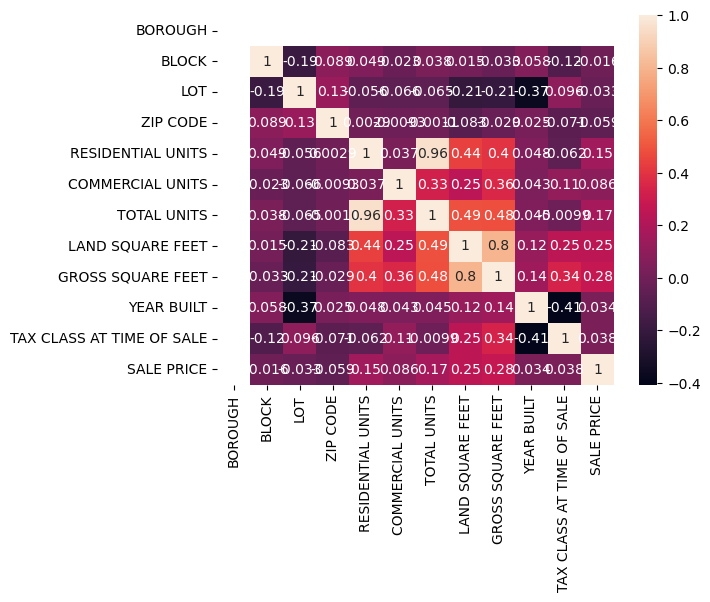

In [18]:
sns.heatmap(numerical_list.corr(), annot = True)

In [19]:
df.dtypes

BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
BUILDING CLASS AT PRESENT                 object
ZIP CODE                                 float64
RESIDENTIAL UNITS                        float64
COMMERCIAL UNITS                         float64
TOTAL UNITS                              float64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                               float64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                               float64
SALE DATE                         datetime64[ns]
dtype: object

In [20]:
df.drop(["BOROUGH", "RESIDENTIAL UNITS"], axis = 1, inplace = True)

In [21]:
df.isnull().sum()

NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ZIP CODE                          0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

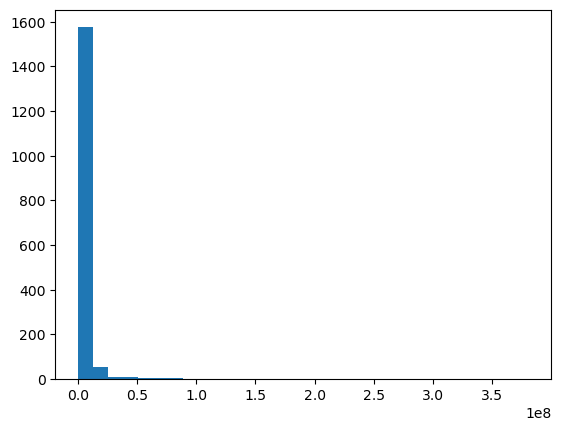

In [22]:
plt.hist(df["SALE PRICE"], bins = 30)
plt.show()

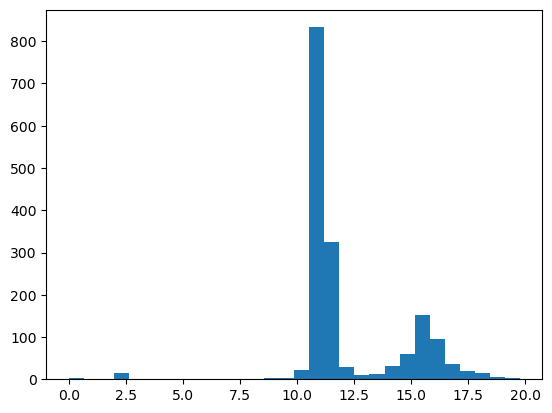

In [23]:

df['SALE PRICE'] = np.log(df['SALE PRICE'])
plt.hist(df["SALE PRICE"], bins = 30)
plt.show()

In [24]:
one_hot = ['BUILDING CLASS CATEGORY','TAX CLASS AT TIME OF SALE', "BUILDING CLASS AT TIME OF SALE"]
dummies = pd.get_dummies(df[one_hot])
dummies.info(verbose=True, memory_usage=True) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1673 entries, 24 to 27375
Data columns (total 18 columns):
 #   Column                                                                Non-Null Count  Dtype
---  ------                                                                --------------  -----
 0   TAX CLASS AT TIME OF SALE                                             1673 non-null   int64
 1   BUILDING CLASS CATEGORY_07  RENTALS - WALKUP APARTMENTS               1673 non-null   uint8
 2   BUILDING CLASS CATEGORY_08  RENTALS - ELEVATOR APARTMENTS             1673 non-null   uint8
 3   BUILDING CLASS CATEGORY_14  RENTALS - 4-10 UNIT                       1673 non-null   uint8
 4   BUILDING CLASS CATEGORY_21  OFFICE BUILDINGS                          1673 non-null   uint8
 5   BUILDING CLASS CATEGORY_22  STORE BUILDINGS                           1673 non-null   uint8
 6   BUILDING CLASS CATEGORY_23  LOFT BUILDINGS                            1673 non-null   uint8
 7   BUILDING CLAS

# Data Visualization

[Text(0, 0, 'ALPHABET CITY            '),
 Text(1, 0, 'CHELSEA                  '),
 Text(2, 0, 'CHINATOWN                '),
 Text(3, 0, 'CIVIC CENTER             '),
 Text(4, 0, 'CLINTON                  '),
 Text(5, 0, 'EAST VILLAGE             '),
 Text(6, 0, 'FASHION                  '),
 Text(7, 0, 'FINANCIAL                '),
 Text(8, 0, 'FLATIRON                 '),
 Text(9, 0, 'GRAMERCY                 '),
 Text(10, 0, 'GREENWICH VILLAGE-CENTRAL'),
 Text(11, 0, 'GREENWICH VILLAGE-WEST   '),
 Text(12, 0, 'HARLEM-CENTRAL           '),
 Text(13, 0, 'HARLEM-EAST              '),
 Text(14, 0, 'HARLEM-UPPER             '),
 Text(15, 0, 'HARLEM-WEST              '),
 Text(16, 0, 'INWOOD                   '),
 Text(17, 0, 'KIPS BAY                 '),
 Text(18, 0, 'LITTLE ITALY             '),
 Text(19, 0, 'LOWER EAST SIDE          '),
 Text(20, 0, 'MANHATTAN VALLEY         '),
 Text(21, 0, 'MIDTOWN CBD              '),
 Text(22, 0, 'MIDTOWN EAST             '),
 Text(23, 0, 'MIDTOWN

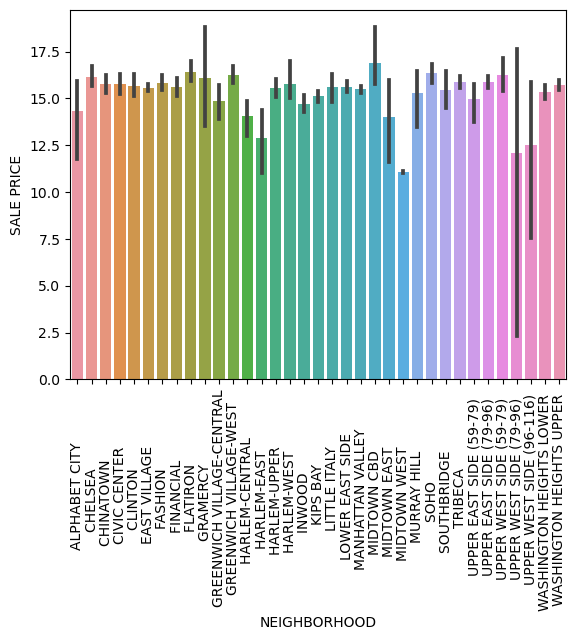

In [25]:

p = sns.barplot(x="NEIGHBORHOOD", y="SALE PRICE", data=df)
p.set_xticklabels(p.get_xticklabels(), rotation=90)

[Text(0, 0, '2012'), Text(1, 0, '2013')]

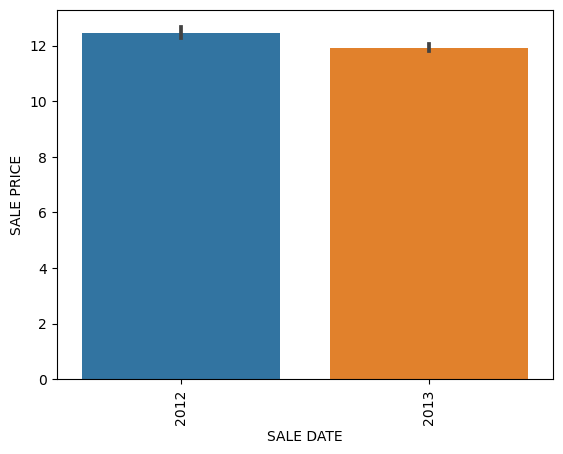

In [26]:
p = sns.barplot(x=df["SALE DATE"].dt.year, y=df["SALE PRICE"])
p.set_xticklabels(p.get_xticklabels(), rotation=90)

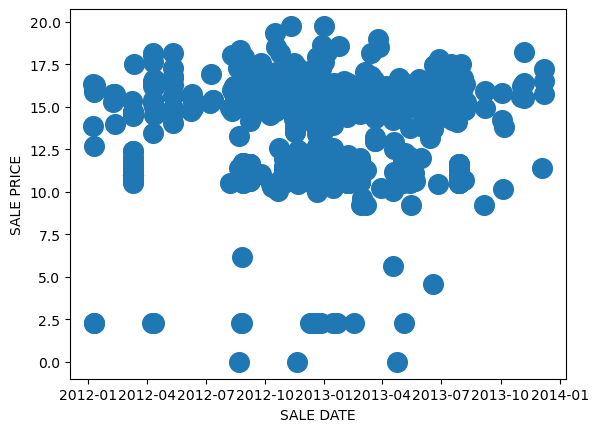

In [27]:
df.plot.scatter(x = 'SALE DATE', y = 'SALE PRICE', s = 200);

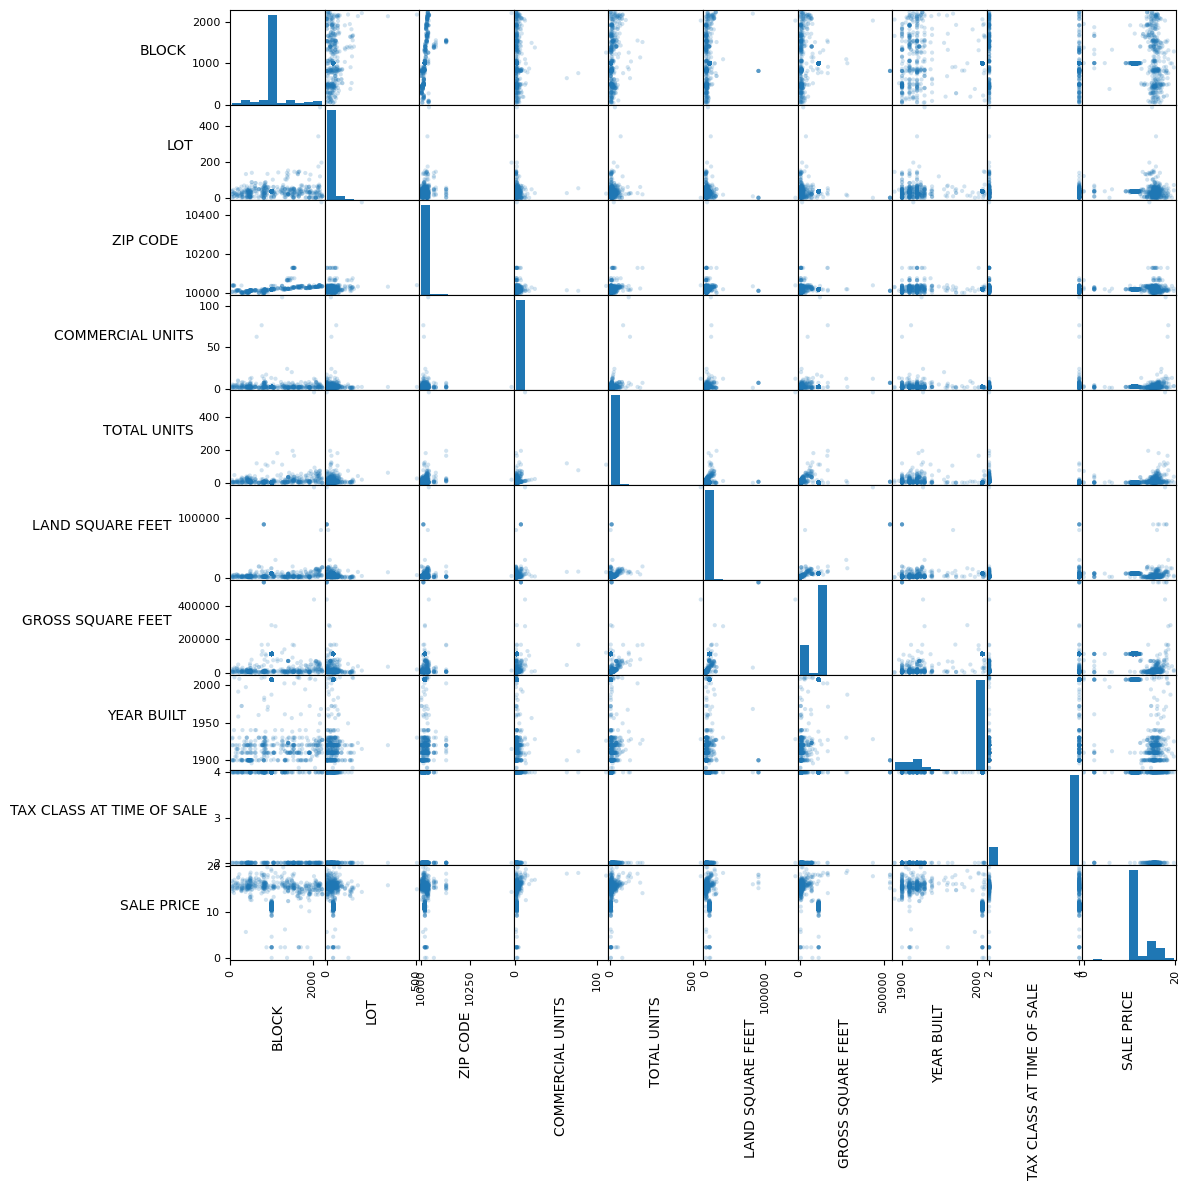

In [28]:
axes = pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(12, 12))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YEAR BUILT', ylabel='Density'>

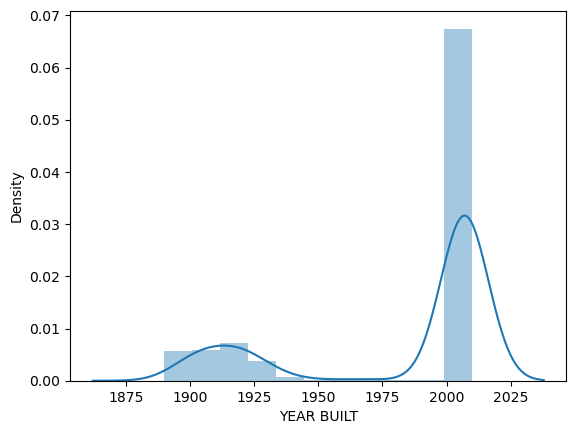

In [29]:
sns.distplot(a=df['YEAR BUILT'],kde=True,hist=True)

<AxesSubplot:xlabel='BUILDING CLASS CATEGORY'>

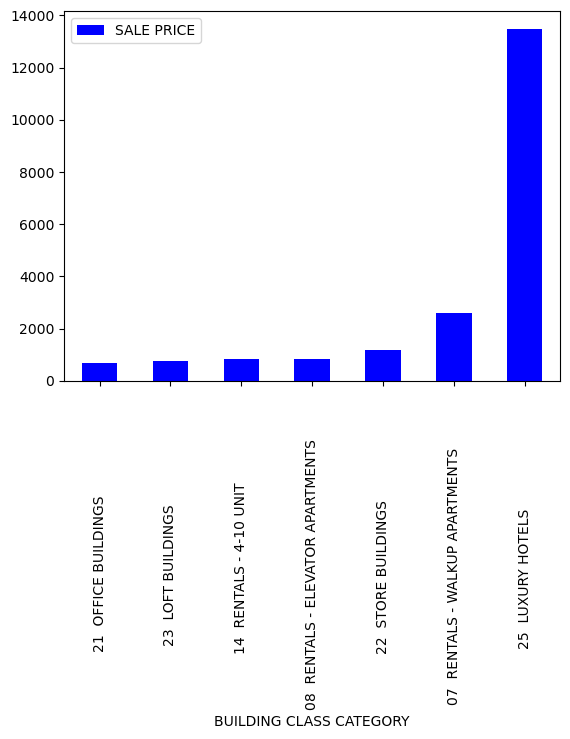

In [30]:
pivot = df.pivot_table(index='BUILDING CLASS CATEGORY', values='SALE PRICE', aggfunc=np.sum).sort_values("SALE PRICE")
pivot.plot(kind='bar', color = 'blue')

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SALE DATE', ylabel='count'>

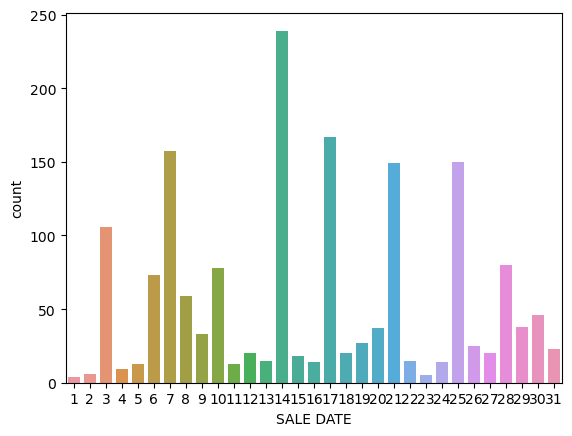

In [31]:
sns.countplot(df["SALE DATE"].dt.day)

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SALE DATE', ylabel='count'>

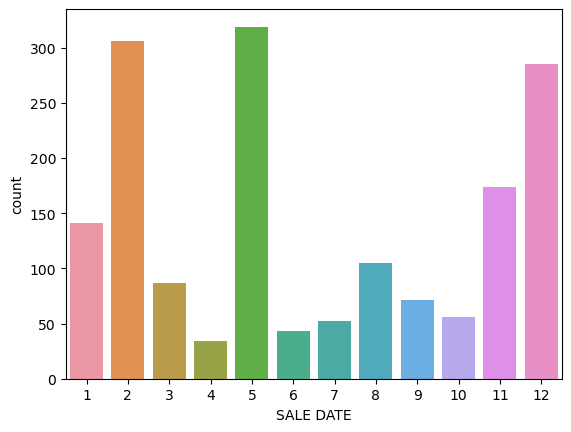

In [32]:
sns.countplot(df["SALE DATE"].dt.month)

In [33]:
df.drop(["BUILDING CLASS AT PRESENT", "NEIGHBORHOOD", 'TAX CLASS AT PRESENT'], axis = 1, inplace = True)
df.drop(['BUILDING CLASS CATEGORY', 'TAX CLASS AT TIME OF SALE', "BUILDING CLASS AT TIME OF SALE"], axis = 1, inplace = True) #ONE-HOT ENCODED
df = pd.concat([df, dummies], axis =1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1673 entries, 24 to 27375
Data columns (total 28 columns):
 #   Column                                                                Non-Null Count  Dtype         
---  ------                                                                --------------  -----         
 0   BLOCK                                                                 1673 non-null   int64         
 1   LOT                                                                   1673 non-null   int64         
 2   ZIP CODE                                                              1673 non-null   float64       
 3   COMMERCIAL UNITS                                                      1673 non-null   float64       
 4   TOTAL UNITS                                                           1673 non-null   float64       
 5   LAND SQUARE FEET                                                      1673 non-null   float64       
 6   GROSS SQUARE FEET                     

In [34]:
df.head(5)

,BLOCK,LOT,ZIP CODE,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,...,BUILDING CLASS AT TIME OF SALE_ C7,BUILDING CLASS AT TIME OF SALE_ D6,BUILDING CLASS AT TIME OF SALE_ D7,BUILDING CLASS AT TIME OF SALE_ H2,BUILDING CLASS AT TIME OF SALE_ K1,BUILDING CLASS AT TIME OF SALE_ K9,BUILDING CLASS AT TIME OF SALE_ L8,BUILDING CLASS AT TIME OF SALE_ O9,BUILDING CLASS AT TIME OF SALE_ S3,BUILDING CLASS AT TIME OF SALE_ S9
24,385,1,10009.0,1.0,8.0,2093.0,5852.0,1997.0,5.645447,2013-04-18,...,1,0,0,0,0,0,0,0,0,0
26,397,33,10009.0,2.0,27.0,3574.0,18212.0,1925.0,16.394642,2013-01-31,...,1,0,0,0,0,0,0,0,0,0
30,398,53,10009.0,3.0,39.0,4452.0,17664.0,1900.0,15.153298,2012-10-26,...,1,0,0,0,0,0,0,0,0,0
36,404,4,10009.0,2.0,27.0,3020.0,15162.0,1920.0,16.349522,2013-01-31,...,1,0,0,0,0,0,0,0,0,0
39,405,10,10009.0,2.0,30.0,3872.0,15428.0,1930.0,16.000773,2013-01-31,...,1,0,0,0,0,0,0,0,0,0


In [35]:
df.isna().sum()

BLOCK                                                                   0
LOT                                                                     0
ZIP CODE                                                                0
COMMERCIAL UNITS                                                        0
TOTAL UNITS                                                             0
LAND SQUARE FEET                                                        0
GROSS SQUARE FEET                                                       0
YEAR BUILT                                                              0
SALE PRICE                                                              0
SALE DATE                                                               0
TAX CLASS AT TIME OF SALE                                               0
BUILDING CLASS CATEGORY_07  RENTALS - WALKUP APARTMENTS                 0
BUILDING CLASS CATEGORY_08  RENTALS - ELEVATOR APARTMENTS               0
BUILDING CLASS CATEGORY_14  RENTALS - 

In [36]:
df.shape

(1673, 28)

# Scaling and Outlier Removal

In [37]:
df["SALE DATE"] = pd.to_numeric(df["SALE DATE"])

scaler = StandardScaler()

df  = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)
df= df.drop_duplicates()

In [38]:
Q1 = df['SALE PRICE'].quantile(0.25)
Q3 = df['SALE PRICE'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['SALE PRICE'] < (Q1 - 1.5 * IQR)) |(df['SALE PRICE'] > (Q3 + 1.5 * IQR)))]

# Linear Regression - Model Building and Testing

In [39]:
X = df.drop(["SALE PRICE"], axis = 1)
y = df["SALE PRICE"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

Training score: 0.8624242481854888
Regression Score: 0.8124554962251052
MSE: 0.18522717881405845
0.8124554962251052
Cross-validation scores: [-0.01678477  0.88252073]
Mean cross-validation score: 0.432867981489671


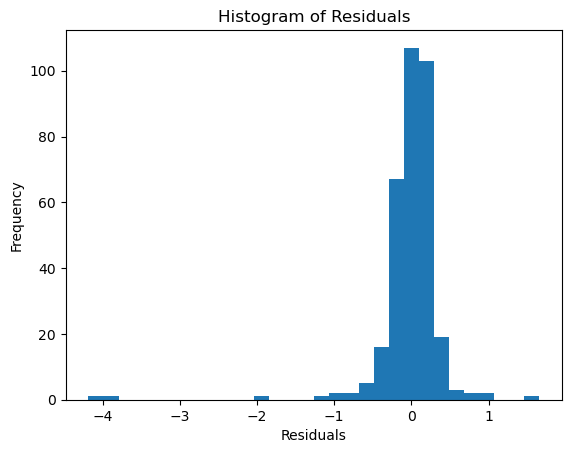

In [40]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print("Training score:", lr.score(x_train, y_train))
print("Regression Score:", lr.score(x_test, y_test))
print("MSE:", mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
y_test_calc = pd.to_numeric(y_test, errors='coerce')
residuals = y_test_calc - y_pred
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X, df['SALE PRICE'], cv=2)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

<AxesSubplot:xlabel='SALE PRICE'>

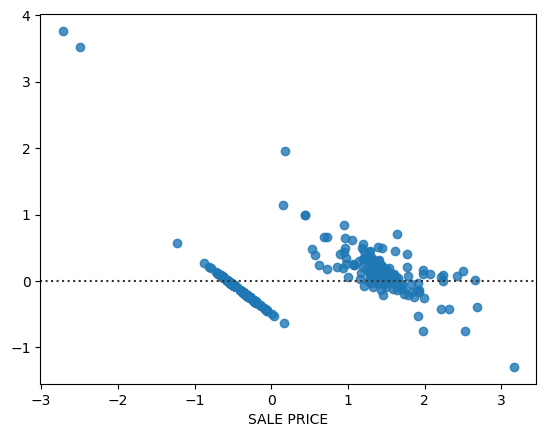

In [41]:
sns.residplot( x = y_test, y = y_pred, data = df)